# Customer Segmentacion: Unsupervised Machine Learning

The aim of the project is to perform customer segmentation analysis using a dataset from a retail store. 

Customer segmentation is a common technique to group customers in different segments based on similar characteristics. In order to do this will use a dataset of 2240 rows and 29 columns from the website kaggle (source: https://www.kaggle.com/imakash3011/customer-personality-analysis). 
The variables and their description are provided below:

**ID**: Customer's unique identifier <br>
**Year_Birth**: Customer's birth year <br>
**Education**: Customer's education level <br>
**Marital_Status**: Customer's marital status <br>
**Income**: Customer's yearly household income<br>
**Kidhome**: Number of children in customer's household <br>
**Teenhome**: Number of teenagers in customer's household <br>
**Dt_Customer**: Date of customer's enrollment with the company <br>
**Recency**: Number of days since customer's last purchase<br>
**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise<br>

**MntWines**: Amount spent on wine in last 2 years<br>
**MntFruits**: Amount spent on fruits in last 2 years <br>
**MntMeatProducts**: Amount spent on meat in last 2 years <br>
**MntFishProducts**: Amount spent on fish in last 2 years<br>
**MntSweetProducts**: Amount spent on sweets in last 2 years <br>
**MntGoldProds**: Amount spent on gold in last 2 years<br>

**NumDealsPurchases**: Number of purchases made with a discount <br>
**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise <br>

**NumWebPurchases**: Number of purchases made through the company’s website <br>
**NumCatalogPurchases**: Number of purchases made using a catalogue <br>
**NumStorePurchases**: Number of purchases made directly in stores <br>
**NumWebVisitsMonth**: Number of visits to company’s website in the last month <br>


## Importing libraries


In [299]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from yellowbrick.cluster import SilhouetteVisualizer
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
#import plotly.express as px
from matplotlib import pyplot
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from yellowbrick.cluster import KElbowVisualizer

## Loading marketing campaign dataset

In [300]:
df=pd.read_csv("Data/marketing_campaign.csv",sep="\t")
print("number of datapoints:",len(df))

number of datapoints: 2240


In [301]:
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Important Functions

**Data Cleaning Function**

In [302]:
# With this funtion we will standarize the columns name, 
# we will remove the missing values and duplicates and drop some columns

def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df = df.drop(columns = ['z_costcontact', 'z_revenue'])
    df=df.dropna()
    df.drop_duplicates()
    
    return df

**Removing outlier function**

In [303]:

def outliers_removal(column):
    percentile25 = X[column].quantile(0.25)
    percentile75 = X[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    X[X[column] > upper_limit]

    X[X[column] < lower_limit]
    new_X = X[X[column] < upper_limit]
    new_X.shape
    new_X_cap = X.copy()
    new_X_cap[column] = np.where(
        new_X_cap[column] > upper_limit,
        upper_limit,
        np.where(
            new_X_cap[column] < lower_limit,
            lower_limit,
            new_X_cap[column]
        )
    )
    plt.figure(figsize=(8,8))

    plt.subplot(2,2,1)
    sns.boxplot(X[column],palette="viridis")

    plt.subplot(2,2,2)
    sns.boxplot(new_X_cap[column],palette="viridis")

    plt.show()

## Clean Data

In [304]:
#let's call our clean data function
df=clean_data(df)

In [305]:
#after the cleaning process our data set has 2216 rows and 27 columns
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


## Exploratory Data Analysis

It is time to understand our data

In [306]:

df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2216 non-null   int64  
 1   year_birth           2216 non-null   int64  
 2   education            2216 non-null   object 
 3   marital_status       2216 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2216 non-null   int64  
 6   teenhome             2216 non-null   int64  
 7   dt_customer          2216 non-null   object 
 8   recency              2216 non-null   int64  
 9   mntwines             2216 non-null   int64  
 10  mntfruits            2216 non-null   int64  
 11  mntmeatproducts      2216 non-null   int64  
 12  mntfishproducts      2216 non-null   int64  
 13  mntsweetproducts     2216 non-null   int64  
 14  mntgoldprods         2216 non-null   int64  
 15  numdealspurchases    2216 non-null   i

### Data type

In [307]:
#It is neccesary to change the data type of the following columns: 
#dt_customer,complaint,response,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4 and acceptedcmp5
#dt_customer. This column should be "datetime"
df["dt_customer"] = pd.to_datetime(df["dt_customer"])


In [308]:
#We will convert some variable into categorical
list= df[["id"]]

df[["id"]]=list.astype(str)

In [309]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2216 non-null   object        
 1   year_birth           2216 non-null   int64         
 2   education            2216 non-null   object        
 3   marital_status       2216 non-null   object        
 4   income               2216 non-null   float64       
 5   kidhome              2216 non-null   int64         
 6   teenhome             2216 non-null   int64         
 7   dt_customer          2216 non-null   datetime64[ns]
 8   recency              2216 non-null   int64         
 9   mntwines             2216 non-null   int64         
 10  mntfruits            2216 non-null   int64         
 11  mntmeatproducts      2216 non-null   int64         
 12  mntfishproducts      2216 non-null   int64         
 13  mntsweetproducts     2216 non-nul

***NOTE: For k-means we need numerical columns. It does not make sense to convert variable to categorical. ***

### Creating new features

<AxesSubplot:>

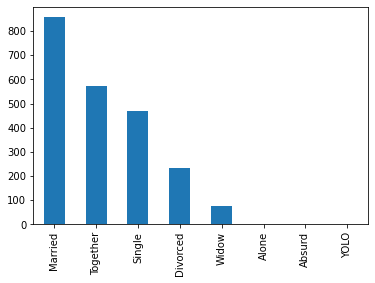

In [310]:
# We check column: "marital_status". 
#We can see 8 different classes
#We need to clean the "marital_status" values
df['marital_status'].value_counts().plot(kind="bar")

In [311]:
df['marital_status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64

In [312]:
df['marital_status']


0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: marital_status, Length: 2216, dtype: object

In [313]:
df['marital_status']=df['marital_status'].replace({"Married": 'relationship', "Together": 'relationship', "Single": 'single', "Alone": 'single', "Divorced": 'single', "Widow": 'single', 'Absurd': "other", "YOLO": "other" })

In [314]:
#df['marital_status']=df['marital_status'].replace({"Married": 1, "Together": 1, "Single": 0, "Alone": 0, "Divorced": 0, "Widow": 0, 'Absurd': 0, "YOLO": 0 })

In [315]:
df['marital_status']

0             single
1             single
2       relationship
3       relationship
4       relationship
            ...     
2235    relationship
2236    relationship
2237          single
2238    relationship
2239    relationship
Name: marital_status, Length: 2216, dtype: object

In [316]:
df['marital_status'].unique()

array(['single', 'relationship', 'other'], dtype=object)

In [317]:
#calculate customer age using year of birth
df["age"] = 2021-df["year_birth"]

In [318]:
# we will have to deal with outliers in Age column
df["age"].max()

128

In [319]:
#calculate total spent using amount spent on different food items
df["total_spent"] = df["mntwines"]+ df["mntfruits"]+ df["mntmeatproducts"]+ df["mntfishproducts"]+ df["mntsweetproducts"]+ df["mntgoldprods"]

In [320]:
# We will calculate since when a customer is enrolled in the company's database
# First we nees to know the latest date registered in our data base
df["dt_customer"].max()

Timestamp('2014-12-06 00:00:00')

In [321]:
#df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


df['last_date'] = '2014-12-06'
df['last_date'] = pd.to_datetime(df['last_date'])
df['regist_days'] = df['last_date'] - df['dt_customer']
df['regist_days'] = df['regist_days'].dt.days
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,total_spent,last_date,regist_days
0,5524,1957,Graduation,single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,1,64,1617,2014-12-06,971
1,2174,1954,Graduation,single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,67,27,2014-12-06,125
2,4141,1965,Graduation,relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,56,776,2014-12-06,472
3,6182,1984,Graduation,relationship,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,37,53,2014-12-06,65
4,5324,1981,PhD,relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,40,422,2014-12-06,321


In [322]:
# calculate the total number of purchases 
df["total_purchase"] = df["numwebpurchases"]+ df["numstorepurchases"]

<AxesSubplot:>

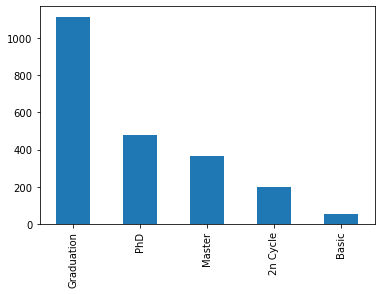

In [323]:
# We check column: "education". 
#We can see 5 different classes

df['education'].value_counts().plot(kind="bar")

In [324]:
df['education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [325]:
df['education']=df['education'].replace({"Basic": 'undergrad', "Graduation": 'graduate', "Master": 'master', "2n Cycle": 'master', "PhD": 'postgrad' })

In [326]:
df['kidhome'].value_counts()

0    1283
1     887
2      46
Name: kidhome, dtype: int64

In [327]:
df['teenhome'].value_counts()

0    1147
1    1018
2      51
Name: teenhome, dtype: int64

In [328]:
#" kidhome" and "teenhome" are very similar columns. 
#in this case we will sum them up in order to have a new column called "parent"
df["parent"]=df['kidhome']+df['teenhome']

In [329]:
df["parent"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: parent, Length: 2216, dtype: int64

In [330]:
# parent will have 2 values: "1": when customer is parent, "0" when the customer is not parent
df["parent"] = np.where(df.parent >0, '1', '0')


In [331]:
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp1,acceptedcmp2,complain,response,age,total_spent,last_date,regist_days,total_purchase,parent
0,5524,1957,graduate,single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,1,64,1617,2014-12-06,971,12,0
1,2174,1954,graduate,single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,67,27,2014-12-06,125,3,1
2,4141,1965,graduate,relationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,56,776,2014-12-06,472,18,0
3,6182,1984,graduate,relationship,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,37,53,2014-12-06,65,6,1
4,5324,1981,postgrad,relationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,40,422,2014-12-06,321,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,graduate,relationship,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,54,1341,2014-12-06,541,13,1
2236,4001,1946,postgrad,relationship,64014.0,2,1,2014-10-06,56,406,...,1,0,0,0,75,444,2014-12-06,61,13,1
2237,7270,1981,graduate,single,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,40,1241,2014-12-06,315,15,0
2238,8235,1956,master,relationship,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,65,843,2014-12-06,316,16,1


In [332]:
#we will drop the columns that we do not need anymore:
df.drop(columns=['year_birth', 'kidhome',"teenhome","dt_customer","last_date"],inplace=True)

In [333]:
df

,id,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,total_spent,regist_days,total_purchase,parent
0,5524,graduate,single,58138.0,58,635,88,546,172,88,...,0,0,0,0,1,64,1617,971,12,0
1,2174,graduate,single,46344.0,38,11,1,6,2,1,...,0,0,0,0,0,67,27,125,3,1
2,4141,graduate,relationship,71613.0,26,426,49,127,111,21,...,0,0,0,0,0,56,776,472,18,0
3,6182,graduate,relationship,26646.0,26,11,4,20,10,3,...,0,0,0,0,0,37,53,65,6,1
4,5324,postgrad,relationship,58293.0,94,173,43,118,46,27,...,0,0,0,0,0,40,422,321,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,graduate,relationship,61223.0,46,709,43,182,42,118,...,0,0,0,0,0,54,1341,541,13,1
2236,4001,postgrad,relationship,64014.0,56,406,0,30,0,0,...,0,1,0,0,0,75,444,61,13,1
2237,7270,graduate,single,56981.0,91,908,48,217,32,12,...,0,0,0,0,0,40,1241,315,15,0
2238,8235,master,relationship,69245.0,8,428,30,214,80,30,...,0,0,0,0,0,65,843,316,16,1


In [334]:
#Creating a feature to get a sum of accepted promotions 
df["total_promos"] =  df["acceptedcmp1"]+ df["acceptedcmp2"]+ df["acceptedcmp3"]+ df["acceptedcmp4"]+ df["acceptedcmp5"]

In [335]:
#We confirm the new columns have the correct data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2216 non-null   object 
 1   education            2216 non-null   object 
 2   marital_status       2216 non-null   object 
 3   income               2216 non-null   float64
 4   recency              2216 non-null   int64  
 5   mntwines             2216 non-null   int64  
 6   mntfruits            2216 non-null   int64  
 7   mntmeatproducts      2216 non-null   int64  
 8   mntfishproducts      2216 non-null   int64  
 9   mntsweetproducts     2216 non-null   int64  
 10  mntgoldprods         2216 non-null   int64  
 11  numdealspurchases    2216 non-null   int64  
 12  numwebpurchases      2216 non-null   int64  
 13  numcatalogpurchases  2216 non-null   int64  
 14  numstorepurchases    2216 non-null   int64  
 15  numwebvisitsmonth    2216 non-null   i

## plots


In [336]:
pallet = ["#A066CB", "#86C7ED", "#1836B2", "#000080"]
cmap = colors.ListedColormap(["#A066CB","#86C7ED",'#1836B2'])

In [337]:

#sns.pairplot(num_df,palette= (["#A066CB"]))


In [338]:
#check the correlation matrix
df.corr()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,total_spent,regist_days,total_purchase,total_promos
income,1.000000,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,...,0.335943,0.276820,0.087545,-0.027225,0.133047,0.161791,0.667576,-0.016712,0.533023,0.308381
recency,-0.003970,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,...,-0.000482,-0.021061,-0.001400,0.013637,-0.199766,0.016295,0.020066,0.030777,-0.003230,-0.013647
mntwines,0.578650,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,...,0.473550,0.351417,0.206185,-0.039470,0.246299,0.159451,0.893136,0.148720,0.688956,0.510833
mntfruits,0.430842,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,...,0.212871,0.191816,-0.009980,-0.005324,0.122443,0.017747,0.613249,0.059609,0.443867,0.157090
mntmeatproducts,0.584633,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,...,0.376867,0.313076,0.043521,-0.023782,0.237746,0.033697,0.845884,0.071345,0.463642,0.307190
mntfishproducts,0.438871,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,...,0.196277,0.261608,0.002345,-0.021220,0.108145,0.040425,0.642371,0.078033,0.442168,0.176111
mntsweetproducts,0.440744,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,0.333937,...,0.259230,0.245102,0.010188,-0.022641,0.116170,0.020204,0.607062,0.076423,0.458574,0.201485
mntgoldprods,0.325916,0.017663,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,0.051905,0.407066,...,0.181397,0.170132,0.050734,-0.031133,0.140332,0.064208,0.528708,0.144956,0.455844,0.196822
numdealspurchases,-0.083101,0.002115,0.008886,-0.134512,-0.121308,-0.143241,-0.121432,0.051905,1.000000,0.241440,...,-0.184253,-0.127374,-0.037981,0.000497,0.003451,0.058668,-0.065854,0.200666,0.167848,-0.125727
numwebpurchases,0.387878,-0.005641,0.553786,0.302039,0.307090,0.299688,0.333937,0.407066,0.241440,1.000000,...,0.141189,0.159292,0.034829,-0.016642,0.151431,0.153051,0.528973,0.172335,0.846086,0.196823


<AxesSubplot:>

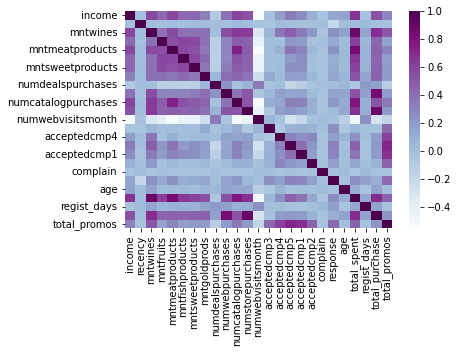

In [339]:
sns.heatmap(df.corr(),cmap ="BuPu")

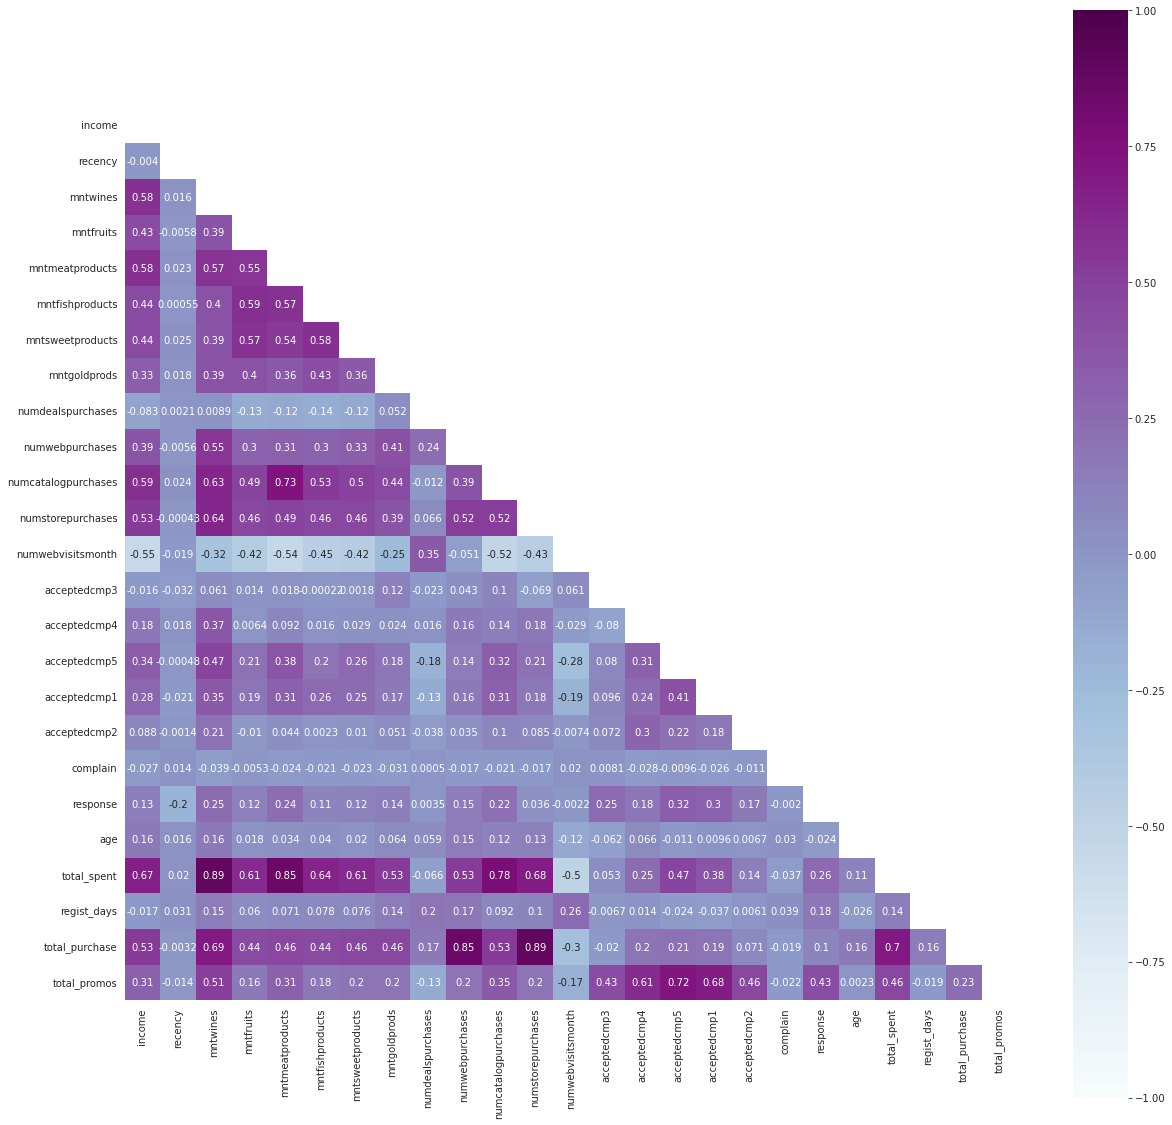

In [340]:
#Heatmap
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap = "BuPu", vmin=-1,vmax=1,annot=True, square=True)

In [341]:
#a few columns are highly correlated with each other (<0,8), that's why we will drop some columns
#df = df.drop(columns = ['mntwines', 'mntmeatproducts', 'numwebpurchases','numstorepurchases'])

In [342]:
df.head()

,id,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,acceptedcmp1,acceptedcmp2,complain,response,age,total_spent,regist_days,total_purchase,parent,total_promos
0,5524,graduate,single,58138.0,58,635,88,546,172,88,...,0,0,0,1,64,1617,971,12,0,0
1,2174,graduate,single,46344.0,38,11,1,6,2,1,...,0,0,0,0,67,27,125,3,1,0
2,4141,graduate,relationship,71613.0,26,426,49,127,111,21,...,0,0,0,0,56,776,472,18,0,0
3,6182,graduate,relationship,26646.0,26,11,4,20,10,3,...,0,0,0,0,37,53,65,6,1,0
4,5324,postgrad,relationship,58293.0,94,173,43,118,46,27,...,0,0,0,0,40,422,321,11,1,0


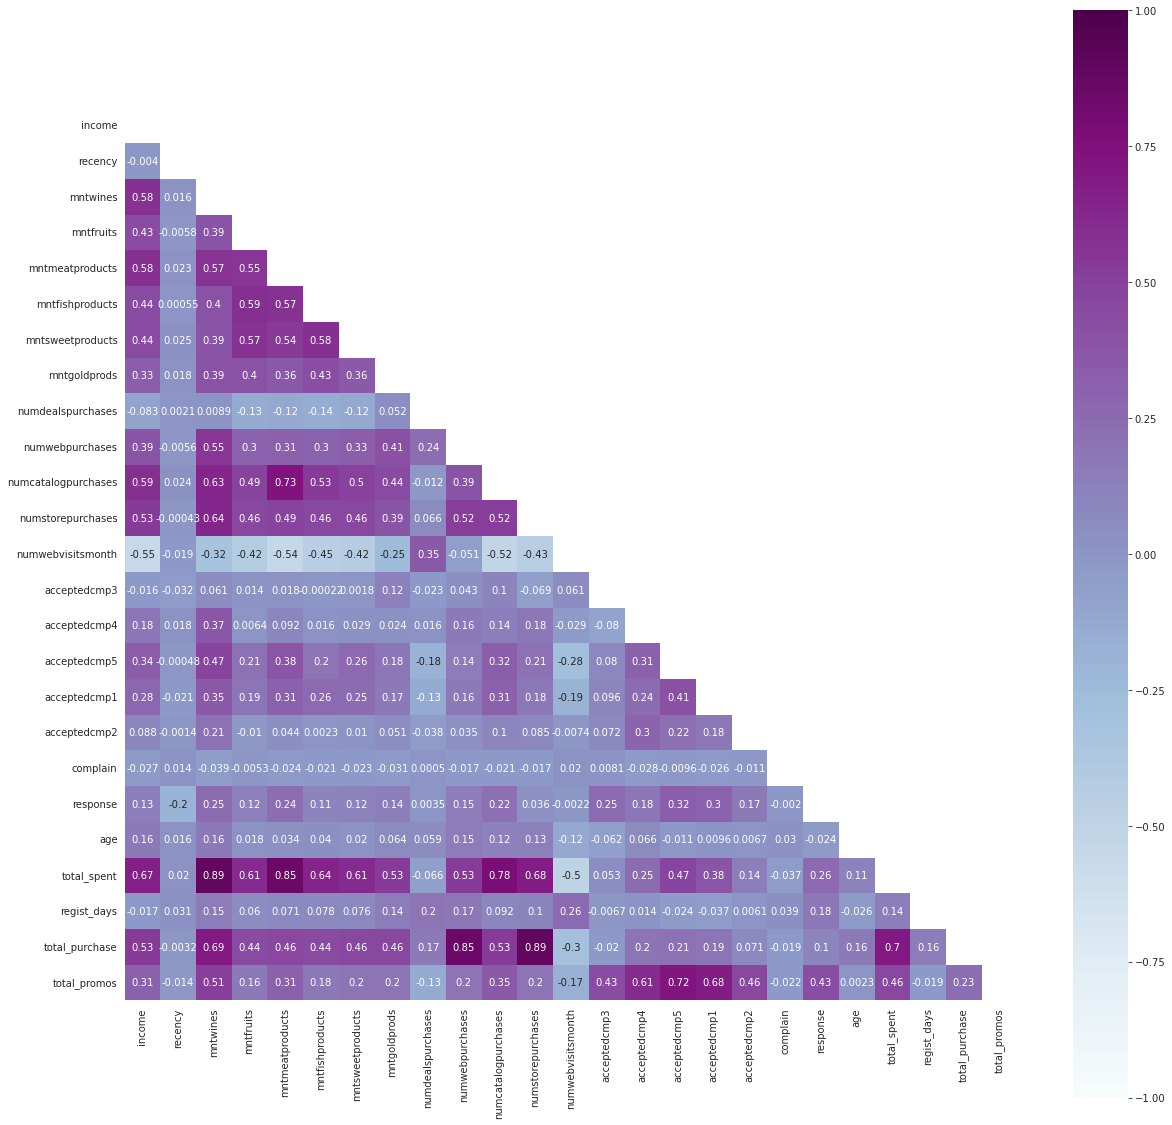

In [343]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap = "BuPu", vmin=-1,vmax=1,annot=True, square=True)

## Check Outliers

In [344]:
X=df._get_numeric_data()
X.head()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,total_spent,regist_days,total_purchase,total_promos
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,0,0,1,64,1617,971,12,0
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,0,0,0,67,27,125,3,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,0,0,0,56,776,472,18,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,0,0,0,37,53,65,6,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,0,0,40,422,321,11,0


<AxesSubplot:>

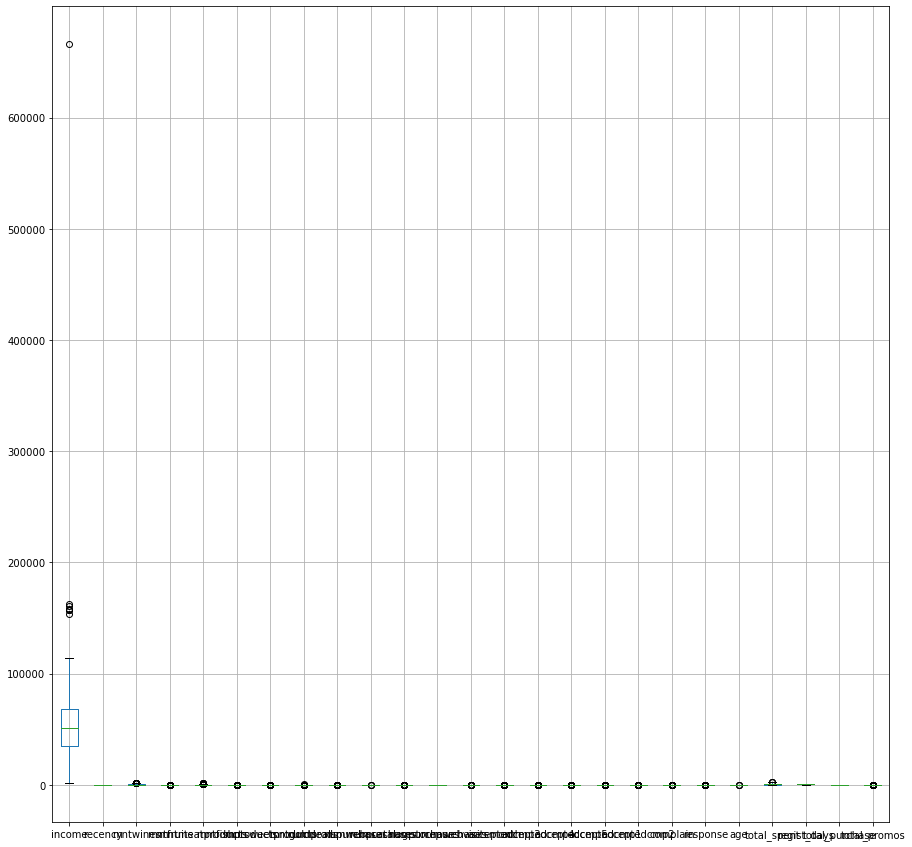

In [345]:
#Boxplot to detect outliers

X.boxplot(figsize=(15,15))

**Removing the outliers from Income**

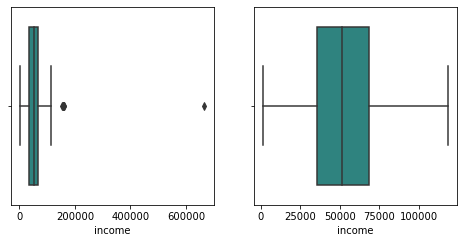

In [346]:
#we can see we have outliers in a few columns
#next step will be removing the outliers
outliers_removal("income")

In [347]:
df=df[df["income"]<600000]

**Removing the outliers from Age**

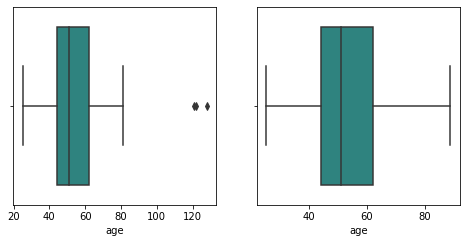

In [348]:
#we have a customer in dataset 128 years old, we remove these outlier from the age column 
outliers_removal("age")

In [349]:
df=df[df["age"]<100]

In [350]:
df["age"].max()

81

In [351]:
# after removing outliers from "income" and "age", 
#we decide do not remove from the rest of cariables in order to keep our volume of data
len(df)

2212

## RFM Analysis

RFM analysis is a marketing technique used to quantitatively rank and group customers based on the **recency**, **frequency** and **monetary** total of their recent transactions to identify the best customers and perform targeted marketing campaigns.<br>

The system assigns each customer numerical scores based on these factors to provide an objective analysis.<br>

What does it mean recency, freqency and monetary? <br>
**Recency**: Number of days since the customer's last purchase. Customers who recently made a purchase have higher probability to buy or use the same product again.<br>
**Frequency**. Number of purchases made by the customer in the store.<br>
**Monetary**. Total spent of the customer in the store <br>

In [352]:
# In order to make the RFM analysis we will extract from our data set the columns:
#"id","recency","total_purchase" and "total_spent"

rfm_df = df.filter(['id','recency','total_purchase','total_spent'], axis=1)

In [353]:
rfm_df

,id,recency,total_purchase,total_spent
0,5524,58,12,1617
1,2174,38,3,27
2,4141,26,18,776
3,6182,26,6,53
4,5324,94,11,422
...,...,...,...,...
2235,10870,46,13,1341
2236,4001,56,13,444
2237,7270,91,15,1241
2238,8235,8,16,843


In [354]:
# We rename the columns "total_spent" and "total_purchase" to keep the nomenclature of the RFM analysis.
rfm_df.columns = ['id', 'recency','frequency','monetary']

In [355]:
rfm_df

,id,recency,frequency,monetary
0,5524,58,12,1617
1,2174,38,3,27
2,4141,26,18,776
3,6182,26,6,53
4,5324,94,11,422
...,...,...,...,...
2235,10870,46,13,1341
2236,4001,56,13,444
2237,7270,91,15,1241
2238,8235,8,16,843


In the RFM Analysis, we normally group customers into four groups based on the distribution of **recency**, **frequency**, and the **monetary** values.<br>

In order to create the customers segments, we will use **quartiles**. We will assign a score from 1 to 4 to **recency**, **frequency** and **monetary**. <br>

4 is the best/highest value, and 1 is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

In [356]:
#First we need the quartiles:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary
0.25,24.0,5.0,69.0
0.50,49.0,10.0,397.0
0.75,74.0,14.0,1048.0


In [357]:
quantiles.to_dict()

{'recency': {0.25: 24.0, 0.5: 49.0, 0.75: 74.0},
 'frequency': {0.25: 5.0, 0.5: 10.0, 0.75: 14.0},
 'monetary': {0.25: 69.0, 0.5: 397.0, 0.75: 1048.0}}

In [358]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def rscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def fmscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [359]:
#create rfm segmentation table

rfm_df['r_quartile'] = rfm_df['recency'].apply(rscore, args=('recency',quantiles,))
rfm_df['f_quartile'] = rfm_df['frequency'].apply(fmscore, args=('frequency',quantiles,))
rfm_df['m_quartile'] = rfm_df['monetary'].apply(fmscore, args=('monetary',quantiles,))

In [360]:
rfm_df['rfmscore'] = rfm_df.r_quartile.map(str) \
                            + rfm_df.f_quartile.map(str) \
                            + rfm_df.m_quartile.map(str)
rfm_df.head()

,id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfmscore
0,5524,58,12,1617,2,3,4,234
1,2174,38,3,27,3,1,1,311
2,4141,26,18,776,3,4,3,343
3,6182,26,6,53,3,2,1,321
4,5324,94,11,422,1,3,3,133


**Highest Recency score** = 4: most recently purchase. <br>
**Highest Frequency score** = 4: most quantity purchase.<br>
**Highest Monetary score** = 4: spent the most.<br>

In [361]:
#We can sort the dataframe based on "rfmscore" and see our most important customers
rfm_df.sort_values('rfmscore',ascending=False)

,id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfmscore
2128,1631,3,15,1282,4,4,4,444
1672,3690,20,17,2091,4,4,4,444
67,9369,19,21,1274,4,4,4,444
336,7381,10,17,1442,4,4,4,444
209,380,17,20,1804,4,4,4,444
...,...,...,...,...,...,...,...,...
1435,922,79,3,48,1,1,1,111
206,5176,88,4,53,1,1,1,111
1433,274,75,5,34,1,1,1,111
806,7326,83,4,63,1,1,1,111


In [362]:
#We create labels
print("stars: ",len(rfm_df[rfm_df['rfmscore']=='444']))
print('loyals: ',len(rfm_df[rfm_df['f_quartile']==4]))#Customers who buy the most often
print("big_spenders: ",len(rfm_df[rfm_df['m_quartile']==4]))#Customers who have generated the most revenue
print('rookies: ', len(rfm_df[rfm_df['rfmscore']=='411']))# First time buyers on the store
print('at_risk: ',len(rfm_df[rfm_df['rfmscore']=='144']))#good past customers who haven't bought recently
print('lost: ',len(rfm_df[rfm_df['rfmscore']=='111']))

stars:  47
loyals:  496
big_spenders:  552
rookies:  128
at_risk:  62
lost:  130


**RFM ananlysys limitations**:

This technique does not include many factors that can be very important to fully understand our customers. For example it does not considerer factors such us age, education, marital status or behaviour in previos marketing campaings.





## K-mean:clustering

***NOTE:The standard k-means algorithm is not  directly applicable to categorical data.
    one approach is to convert categorical data into numerical. 
    (converting categorical attributes to binary values, and then doing k-means as if these were numeric values
    is another approach that has been tried before)***

In [363]:
df

,id,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,acceptedcmp1,acceptedcmp2,complain,response,age,total_spent,regist_days,total_purchase,parent,total_promos
0,5524,graduate,single,58138.0,58,635,88,546,172,88,...,0,0,0,1,64,1617,971,12,0,0
1,2174,graduate,single,46344.0,38,11,1,6,2,1,...,0,0,0,0,67,27,125,3,1,0
2,4141,graduate,relationship,71613.0,26,426,49,127,111,21,...,0,0,0,0,56,776,472,18,0,0
3,6182,graduate,relationship,26646.0,26,11,4,20,10,3,...,0,0,0,0,37,53,65,6,1,0
4,5324,postgrad,relationship,58293.0,94,173,43,118,46,27,...,0,0,0,0,40,422,321,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,graduate,relationship,61223.0,46,709,43,182,42,118,...,0,0,0,0,54,1341,541,13,1,0
2236,4001,postgrad,relationship,64014.0,56,406,0,30,0,0,...,1,0,0,0,75,444,61,13,1,1
2237,7270,graduate,single,56981.0,91,908,48,217,32,12,...,0,0,0,0,40,1241,315,15,0,1
2238,8235,master,relationship,69245.0,8,428,30,214,80,30,...,0,0,0,0,65,843,316,16,1,0


In [364]:
#We do not need "id " anymore, so we drop it form the model. 
df = df.drop(columns = ['id','acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5','response','complain'])

In [365]:
df

,education,marital_status,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,age,total_spent,regist_days,total_purchase,parent,total_promos
0,graduate,single,58138.0,58,635,88,546,172,88,88,...,8,10,4,7,64,1617,971,12,0,0
1,graduate,single,46344.0,38,11,1,6,2,1,6,...,1,1,2,5,67,27,125,3,1,0
2,graduate,relationship,71613.0,26,426,49,127,111,21,42,...,8,2,10,4,56,776,472,18,0,0
3,graduate,relationship,26646.0,26,11,4,20,10,3,5,...,2,0,4,6,37,53,65,6,1,0
4,postgrad,relationship,58293.0,94,173,43,118,46,27,15,...,5,3,6,5,40,422,321,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,graduate,relationship,61223.0,46,709,43,182,42,118,247,...,9,3,4,5,54,1341,541,13,1,0
2236,postgrad,relationship,64014.0,56,406,0,30,0,0,8,...,8,2,5,7,75,444,61,13,1,1
2237,graduate,single,56981.0,91,908,48,217,32,12,24,...,2,3,13,6,40,1241,315,15,0,1
2238,master,relationship,69245.0,8,428,30,214,80,30,61,...,6,5,10,3,65,843,316,16,1,0


In [366]:
df["parent"] = pd.to_numeric(df["parent"], errors='coerce')

In [367]:
#Do we have categorical columns?
df.select_dtypes('object')

,education,marital_status
0,graduate,single
1,graduate,single
2,graduate,relationship
3,graduate,relationship
4,postgrad,relationship
...,...,...
2235,graduate,relationship
2236,postgrad,relationship
2237,graduate,single
2238,master,relationship


In [368]:
df=pd.get_dummies(df, drop_first=True)

In [369]:
df

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,total_spent,regist_days,total_purchase,parent,total_promos,education_master,education_postgrad,education_undergrad,marital_status_relationship,marital_status_single
0,58138.0,58,635,88,546,172,88,88,3,8,...,1617,971,12,0,0,0,0,0,0,1
1,46344.0,38,11,1,6,2,1,6,2,1,...,27,125,3,1,0,0,0,0,0,1
2,71613.0,26,426,49,127,111,21,42,1,8,...,776,472,18,0,0,0,0,0,1,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,53,65,6,1,0,0,0,0,1,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,422,321,11,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,1341,541,13,1,0,0,0,0,1,0
2236,64014.0,56,406,0,30,0,0,8,7,8,...,444,61,13,1,1,0,1,0,1,0
2237,56981.0,91,908,48,217,32,12,24,1,2,...,1241,315,15,0,1,0,0,0,0,1
2238,69245.0,8,428,30,214,80,30,61,2,6,...,843,316,16,1,0,1,0,0,1,0


In [370]:
X=df._get_numeric_data()

In [371]:
X

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,total_spent,regist_days,total_purchase,parent,total_promos,education_master,education_postgrad,education_undergrad,marital_status_relationship,marital_status_single
0,58138.0,58,635,88,546,172,88,88,3,8,...,1617,971,12,0,0,0,0,0,0,1
1,46344.0,38,11,1,6,2,1,6,2,1,...,27,125,3,1,0,0,0,0,0,1
2,71613.0,26,426,49,127,111,21,42,1,8,...,776,472,18,0,0,0,0,0,1,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,53,65,6,1,0,0,0,0,1,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,422,321,11,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,1341,541,13,1,0,0,0,0,1,0
2236,64014.0,56,406,0,30,0,0,8,7,8,...,444,61,13,1,1,0,1,0,1,0
2237,56981.0,91,908,48,217,32,12,24,1,2,...,1241,315,15,0,1,0,0,0,0,1
2238,69245.0,8,428,30,214,80,30,61,2,6,...,843,316,16,1,0,1,0,0,1,0


In [372]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())


,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,total_spent,regist_days,total_purchase,parent,total_promos,education_master,education_postgrad,education_undergrad,marital_status_relationship,marital_status_single
0,58138.0,58,635,88,546,172,88,88,3,8,...,1617,971,12,0,0,0,0,0,0,1
1,46344.0,38,11,1,6,2,1,6,2,1,...,27,125,3,1,0,0,0,0,0,1
2,71613.0,26,426,49,127,111,21,42,1,8,...,776,472,18,0,0,0,0,0,1,0
3,26646.0,26,11,4,20,10,3,5,2,2,...,53,65,6,1,0,0,0,0,1,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,422,321,11,1,0,0,1,0,1,0


In [373]:
X_scaled_df.describe()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,total_spent,regist_days,total_purchase,parent,total_promos,education_master,education_postgrad,education_undergrad,marital_status_relationship,marital_status_single
count,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,...,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03,2.212000e+03
mean,-1.146141e-16,-2.491979e-17,4.617564e-17,1.149372e-17,2.800653e-17,-1.736606e-17,-5.586249e-17,6.901251e-18,-2.652590e-16,-1.537599e-16,...,6.188540e-17,1.450517e-16,1.825444e-16,-6.594082e-16,8.156024e-17,-5.044187e-17,-2.603905e-16,5.330275e-17,-2.087942e-17,-7.719363e-17
std,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,...,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00,1.000226e+00
min,-2.333791e+00,-1.694030e+00,-9.052351e-01,-6.626279e-01,-7.449911e-01,-6.875269e-01,-6.583604e-01,-8.497071e-01,-1.208163e+00,-1.491175e+00,...,-9.998189e-01,-2.202781e+00,-1.894728e+00,-1.581139e+00,-4.391600e-01,-5.843107e-01,-5.264373e-01,-1.581871e-01,-1.349603e+00,-7.380330e-01
25%,-7.771113e-01,-8.646302e-01,-8.340705e-01,-6.122946e-01,-6.736275e-01,-6.327421e-01,-6.340186e-01,-6.756101e-01,-6.884322e-01,-7.616650e-01,...,-8.935732e-01,-7.404087e-01,-9.372790e-01,-1.581139e+00,-4.391600e-01,-5.843107e-01,-5.264373e-01,-1.581871e-01,-1.349603e+00,-7.380330e-01
50%,-2.731156e-02,-6.717941e-04,-3.848445e-01,-4.612945e-01,-4.416956e-01,-4.683875e-01,-4.636265e-01,-3.757762e-01,-1.687011e-01,-3.215516e-02,...,-3.490638e-01,3.680820e-03,2.017050e-02,6.324555e-01,-4.391600e-01,-5.843107e-01,-5.264373e-01,-1.581871e-01,7.409586e-01,-7.380330e-01
75%,7.679525e-01,8.632866e-01,5.921851e-01,1.678727e-01,2.908968e-01,2.255541e-01,1.449170e-01,2.335637e-01,3.510299e-01,6.973547e-01,...,7.316544e-01,7.477704e-01,7.861301e-01,6.324555e-01,-4.391600e-01,1.711418e+00,-5.264373e-01,-1.581871e-01,7.409586e-01,1.354953e+00
max,5.131311e+00,1.727245e+00,3.521791e+00,4.345543e+00,6.948902e+00,4.042233e+00,5.719175e+00,5.359756e+00,6.587802e+00,8.357208e+00,...,3.183607e+00,2.369283e+00,3.275499e+00,6.324555e-01,5.448245e+00,1.711418e+00,1.899561e+00,6.321627e+00,7.409586e-01,1.354953e+00


**Dataframe to be used for further modelling**

In [374]:

X_scaled_df

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,total_spent,regist_days,total_purchase,parent,total_promos,education_master,education_postgrad,education_undergrad,marital_status_relationship,marital_status_single
0,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,...,1.676245,1.973583,0.403150,-1.581139,-0.439160,-0.584311,-0.526437,-0.158187,-1.349603,1.354953
1,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,...,-0.963297,-1.665144,-1.320259,0.632456,-0.439160,-0.584311,-0.526437,-0.158187,-1.349603,1.354953
2,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,...,0.280110,-0.172664,1.552090,-1.581139,-0.439160,-0.584311,-0.526437,-0.158187,0.740959,-0.738033
3,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,...,-0.920135,-1.923210,-0.745789,0.632456,-0.439160,-0.584311,-0.526437,-0.158187,0.740959,-0.738033
4,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,...,-0.307562,-0.822130,0.211660,0.632456,-0.439160,-0.584311,1.899561,-0.158187,0.740959,-0.738033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,...,1.218061,0.124112,0.594640,0.632456,-0.439160,-0.584311,-0.526437,-0.158187,0.740959,-0.738033
2208,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,...,-0.271040,-1.940414,0.594640,0.632456,1.032691,-0.584311,1.899561,-0.158187,0.740959,-0.738033
2209,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,...,1.052052,-0.847936,0.977620,-1.581139,1.032691,-0.584311,-0.526437,-0.158187,-1.349603,1.354953
2210,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,...,0.391336,-0.843635,1.169110,0.632456,-0.439160,1.711418,-0.526437,-0.158187,0.740959,-0.738033


AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

In [375]:
#k_means: randomly picked 8 clusters: 
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

In [376]:
len(kmeans.labels_)

2212

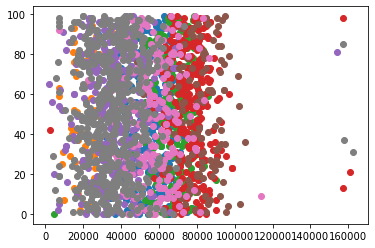

In [377]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 0], X.to_numpy()[row_ix, 1])
    # show the plot
pyplot.show()

In [378]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    318
1     54
2    208
3    336
4    352
5    127
6    213
7    604
dtype: int64

In [379]:
X["cluster"] = clusters
X.head()

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,regist_days,total_purchase,parent,total_promos,education_master,education_postgrad,education_undergrad,marital_status_relationship,marital_status_single,cluster
0,58138.0,58,635,88,546,172,88,88,3,8,...,971,12,0,0,0,0,0,0,1,3
1,46344.0,38,11,1,6,2,1,6,2,1,...,125,3,1,0,0,0,0,0,1,4
2,71613.0,26,426,49,127,111,21,42,1,8,...,472,18,0,0,0,0,0,1,0,2
3,26646.0,26,11,4,20,10,3,5,2,2,...,65,6,1,0,0,0,0,1,0,7
4,58293.0,94,173,43,118,46,27,15,5,5,...,321,11,1,0,0,1,0,1,0,0


**PCA**

In [388]:
X_scaled_df

,income,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,...,total_spent,regist_days,total_purchase,parent,total_promos,education_master,education_postgrad,education_undergrad,marital_status_relationship,marital_status_single
0,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,...,1.676245,1.973583,0.403150,-1.581139,-0.439160,-0.584311,-0.526437,-0.158187,-1.349603,1.354953
1,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,...,-0.963297,-1.665144,-1.320259,0.632456,-0.439160,-0.584311,-0.526437,-0.158187,-1.349603,1.354953
2,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,...,0.280110,-0.172664,1.552090,-1.581139,-0.439160,-0.584311,-0.526437,-0.158187,0.740959,-0.738033
3,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,...,-0.920135,-1.923210,-0.745789,0.632456,-0.439160,-0.584311,-0.526437,-0.158187,0.740959,-0.738033
4,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,...,-0.307562,-0.822130,0.211660,0.632456,-0.439160,-0.584311,1.899561,-0.158187,0.740959,-0.738033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,...,1.218061,0.124112,0.594640,0.632456,-0.439160,-0.584311,-0.526437,-0.158187,0.740959,-0.738033
2208,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,...,-0.271040,-1.940414,0.594640,0.632456,1.032691,-0.584311,1.899561,-0.158187,0.740959,-0.738033
2209,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,...,1.052052,-0.847936,0.977620,-1.581139,1.032691,-0.584311,-0.526437,-0.158187,-1.349603,1.354953
2210,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,...,0.391336,-0.843635,1.169110,0.632456,-0.439160,1.711418,-0.526437,-0.158187,0.740959,-0.738033


In [386]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')

pca.fit(X_scaled)

X_scaled = pca.transform(X_scaled)

cols = [ 'PCA_' + str(i) for i in list(range(1,len(X.columns)+1))]

X_scaled = pd.DataFrame(X, columns = cols)

#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test  = pd.DataFrame(X_test , columns = X.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [381]:
pca.explained_variance_ratio_

array([3.26758463e-01, 9.06816984e-02, 8.24551795e-02, 6.29220317e-02,
       5.18260106e-02, 4.56011175e-02, 4.20778243e-02, 3.69076283e-02,
       3.66871415e-02, 3.16872101e-02, 2.99750083e-02, 2.54637745e-02,
       2.33179366e-02, 2.02508937e-02, 1.80424775e-02, 1.75892837e-02,
       1.64386011e-02, 1.36558933e-02, 1.08344825e-02, 9.48717764e-03,
       7.17817837e-03, 1.61988230e-04, 7.69226089e-33, 2.36663091e-33])

ValueError: x and y must have same first dimension, but have shapes (7,) and (24,)

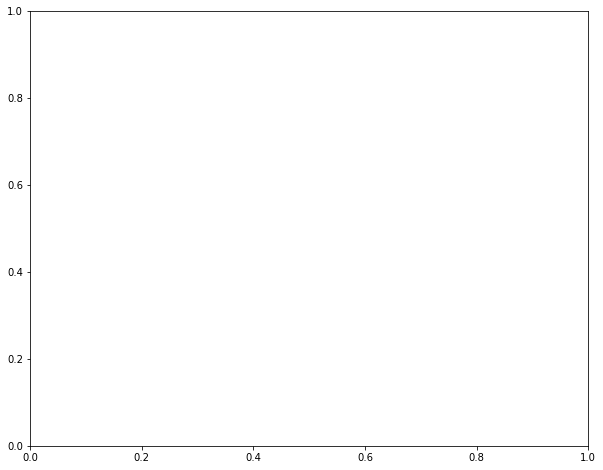

In [382]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle ='--')
plt.xlabel('Number of components')
plt.ylabel("Cumulative variance")

In [281]:


pca = PCA().fit(X_scaled_df)

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

UsageError: Line magic function `%` not found.


In [266]:
pca = PCA(n_components=3)
pca.fit(X_scaled_df)
PCA_ds = pd.DataFrame(pca.transform(X_scaled_df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,2.108018e-16,2.801027,-5.372712,-2.624577,-0.695825,2.439050,7.821843
col2,2212.0,9.807305e-17,1.475583,-4.299536,-1.027993,-0.152139,0.938337,5.414637
col3,2212.0,-1.284887e-17,1.407059,-2.693799,-1.158373,-0.609965,1.479832,3.465192


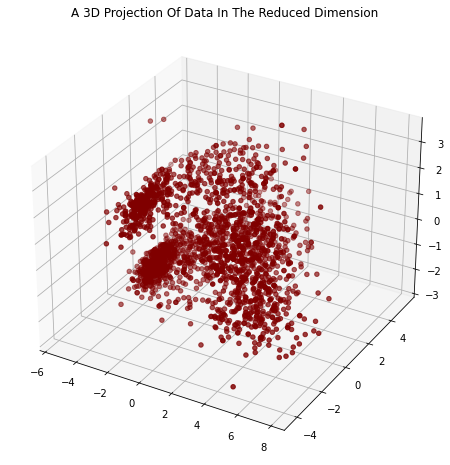

In [267]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## choosing K

model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(X_scaled_df)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

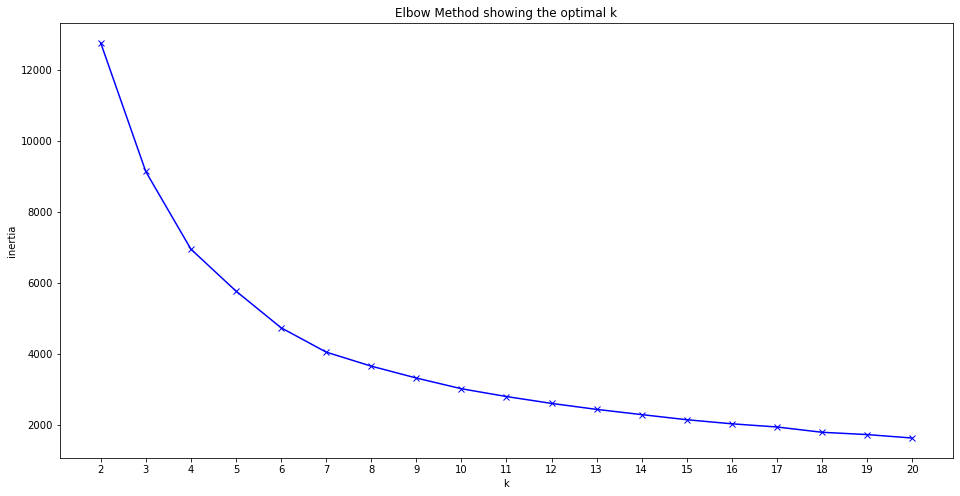

In [268]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(PCA_ds)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Elbow method is not very clear. 
We will use Silhoutte

In [269]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=10,metric='silhouette')
visualizer.fit(PCA-ds)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


NameError: name 'KElbowVisualizer' is not defined

In [270]:
#Silhoutte Score
K = range(2, 20)
km = KMeans(n_clusters=4, random_state=42)
#
# Fit the KMeans model
#
km.fit_predict(PCA_ds)
#
# Calculate Silhoutte Score
#
score = silhouette_score(PCA_ds, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.430


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 4, figsize=(15,8))
for i in [2, 3, 4, 5,6,7,8]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [ ]:
#According to Silhoutte Score we need 4 clusters. 

In [271]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(PCA_ds)

KMeans(n_clusters=4, random_state=1234)

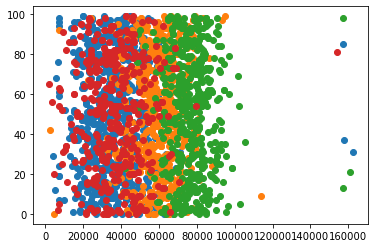

In [272]:
labels = kmeans.predict(PCA_ds)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 0], X.to_numpy()[row_ix, 1])
    # show the plot
pyplot.show()

In [273]:
clusters = kmeans.predict(PCA_ds)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    724
1    539
2    542
3    407
dtype: int64

In [275]:
PCA_ds["cluster"] = clusters
PCA_ds.head()

,col1,col2,col3,cluster
0,4.197739,-0.373384,2.027474,2
1,-2.701370,-1.704095,1.382842,3
2,2.277202,0.411962,-0.965955,2
3,-2.855566,-0.563653,-1.309684,0
4,-0.247457,1.089061,-0.687849,1


## Insight inside each cluster

In [ ]:
pal = ["#682F2F","#B9C0C9","#9F8A78","#F3AB60",'#1836B2','#86C7ED']
pl = sns.countplot(x=X["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
pal = ["#682F2F","#B9C0C9","#9F8A78","#F3AB60",'#1836B2','#86C7ED']#'#A066CB','#c73333']

pl = sns.scatterplot(x=X["total_spent"], y=X["income"],hue=X["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

group 0: high spending & average income
group 1: high spending & high income
group 2: low spending & low income
group 3: high spending & low income

In [ ]:
plt.figure()
pl=sns.swarmplot(x=X["cluster"], y=X["total_spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=X["cluster"], y=X["total_spent"], palette=pal)
plt.show()

In [ ]:

#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["total_promos"],hue=X["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

promotions are not effective. 
Initial promotion was very effective,specially with cst of cluster 2. 
The rest of promotions were less and less effective until promotion number 5, where no one participated. 

In [ ]:
plt.figure()
pl=sns.boxenplot(y=X["numdealspurchases"],x=X["cluster"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

In [ ]:
plt.figure()
pl = sns.countplot(x=df["numdealspurchases"],hue=X["cluster"], palette= pal)
pl.set_title("Number of Deals Purchased")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [ ]:
X.columns

In [ ]:
plt.figure()
pl=sns.boxenplot(y=X["numwebpurchases"],x=X["cluster"], palette= pal)
pl.set_title("Number of online purchases")
plt.show()

In [ ]:
plt.figure()
pl = sns.countplot(x=df["numwebpurchases"],hue=X["cluster"], palette= pal)
pl.set_title("number of online purchases")

plt.show()

In [ ]:
plt.figure()
pl=sns.boxenplot(y=X["age"],x=X["cluster"], palette= pal)
pl.set_title("Age")
plt.show()

In [ ]:
plt.figure()
pl = sns.countplot(x=df["age"],hue=X["cluster"], palette= pal)
pl.set_title("Number of web visits per month")

plt.show()

In [ ]:
plt.figure()
pl=sns.boxenplot(y=X["mntwines"],x=X["cluster"], palette= pal)
pl.set_title("wine")
plt.show()

In [ ]:
plt.figure()
pl=sns.boxenplot(y=X["education_undergrad"],x=X["cluster"], palette= pal)
pl.set_title("education_undergrad")
plt.show()